In [4]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: FC0C-B17E

 C:\Users\User\python_notebook\DrivingHelper 디렉터리

2021-04-15  오후 08:52    <DIR>          .
2021-04-15  오후 08:52    <DIR>          ..
2021-04-15  오후 03:47             6,148 .DS_Store
2021-04-15  오후 03:47    <DIR>          .ipynb_checkpoints
2021-04-15  오후 05:05    <DIR>          beginner_expert_processedData
2021-04-15  오후 03:47    <DIR>          beginner_expert_RawData
2021-04-15  오후 08:52         1,135,029 dataprocessing.ipynb
2021-04-15  오후 03:47               117 README.md
               3개 파일           1,141,294 바이트
               5개 디렉터리  211,777,544,192 바이트 남음


### Storing Beginners' Data

In [5]:
import pandas as pd

In [6]:
df_begin = []
f_1 = 'beginner_expert_processedData/beginner/beginner_'
f_3 = '.csv'
num_begin = 35
for idx in range(1, num_begin+1):
    tmp_file = f_1+str(idx)+'_new2'+f_3
    df = pd.read_csv(tmp_file)
    df = df.dropna()
    df = df.loc[:,['Time', 'Distance','Ground Speed',"Brake Pos",'Throttle Pos','Steering Angle','Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate',
                    'CG Accel Lateral', 'CG Accel Longitudinal','CG Accel Vertical','CG Distance', 
                   'Lateral Velocity', 'Longitudinal Velocity','Lateral Acceleration', 'Longitudinal Acceleration']]
    df_begin.append(df)

### Storing Expert Data

In [7]:
df_exp = []
f_1 = 'beginner_expert_processedData/expert/expert_'
f_3 = '.csv'
num_exp = 19
for idx in range(1, num_exp+1):
    tmp_file = f_1+str(idx)+'_new2'+f_3
    df = pd.read_csv(tmp_file)
    df = df.dropna()
    df = df.loc[:,['Time', 'Distance','Ground Speed',"Brake Pos",'Throttle Pos','Steering Angle','Chassis Velocity X','Chassis Velocity Y','Chassis Velocity Z','Chassis Yaw Rate',
                    'CG Accel Lateral', 'CG Accel Longitudinal','CG Accel Vertical','CG Distance', 
                   'Lateral Velocity', 'Longitudinal Velocity','Lateral Acceleration', 'Longitudinal Acceleration']]
    df_exp.append(df)
    
    

#### Setting Curve Distance Data

In [8]:
#set curve_num -1 if plotting whole distance
curve_num = 0
#curve_num exists from 0 to 5
curveList = [[103.9, 209.3], [316.6, 399.6], [425.3, 517.9], [590.5, 756.9], [1048.7, 1110.5], [1212.3, 1437.1]]

### Setting Features

###### Brake Pos, Ground Speed, Steering Angle, Throttle Pos, Chassis Yaw Rate, Chassis Velocity XYZ

In [9]:
## Initializing Features that we wanna plot
featureList = ["Brake Pos", "Steering Angle", "Throttle Pos","Ground Speed", "Chassis Yaw Rate"]
featureList2 = ["CG Distance","Lateral Velocity","Longitudinal Velocity", "Lateral Acceleration","Longitudinal Acceleration"]
featureList3 = ['CG Accel Lateral', 'CG Accel Longitudinal','CG Accel Vertical','CG Distance']



(3.2, 1714.8)

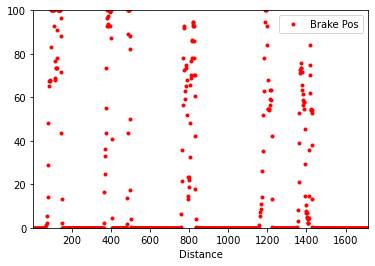

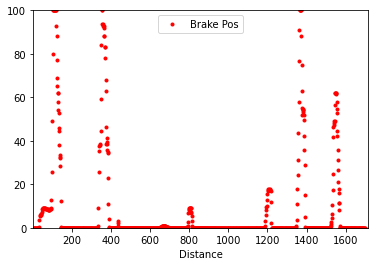

In [10]:
ax = df_exp[3].astype(float).plot(x='Distance', y= featureList[0], style='.', color='r')
ax.set_ylim(df_exp[1][featureList[0]].astype(float).min(), df_exp[0][featureList[0]].astype(float).max())
ax.set_xlim(df_exp[1]['Distance'].astype(float).min(), df_exp[0]['Distance'].astype(float).max())

ax = df_begin[9].astype(float).plot(x='Distance', y= featureList[0], style='.', color='r')
ax.set_ylim(df_begin[1][featureList[0]].astype(float).min(), df_exp[0][featureList[0]].astype(float).max())
ax.set_xlim(df_begin[1]['Distance'].astype(float).min(), df_exp[0]['Distance'].astype(float).max())


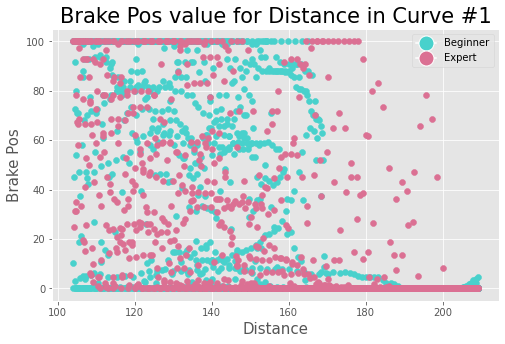

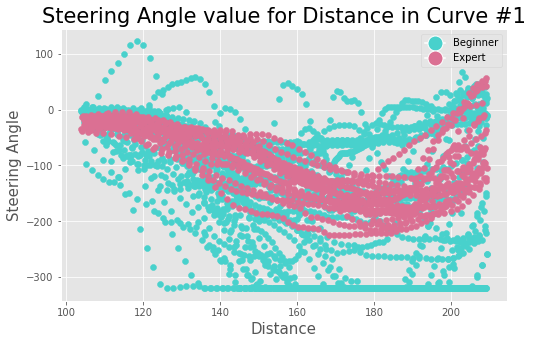

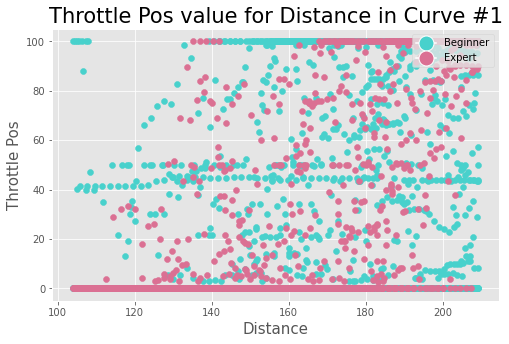

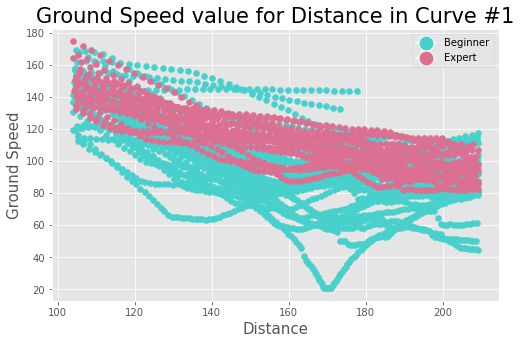

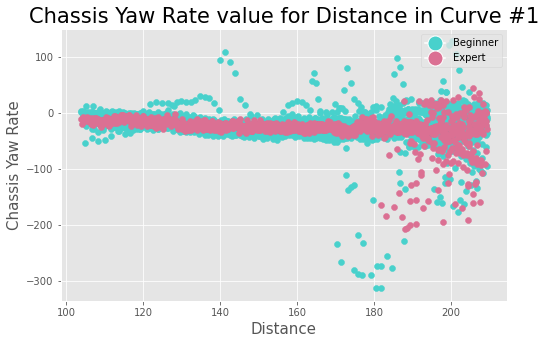

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

style.use('ggplot')

if curve_num != -1:
    for feature in featureList:    
        plt.figure(figsize=(8,5))

        for i in range(0, num_begin):
            tmp = df_begin[i].astype(float)
            tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
            plt.scatter(tmprows['Distance'], tmprows[feature], color='mediumturquoise')

        for j in range(0, num_exp):
            tmp = df_exp[j].astype(float)
            tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
            plt.scatter(tmprows['Distance'], tmprows[feature], color='palevioletred')

        plt.xlabel('Distance', fontsize=15)
        plt.ylabel(feature, fontsize=15)
        plt.title(str(feature)+" value for Distance in Curve #" + str(curve_num+1), fontsize=21)

        legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'Beginner', markerfacecolor='mediumturquoise', markersize=15),
                          Line2D([0], [0], marker='o', color='w', label = 'Expert', markerfacecolor = 'palevioletred', markersize=15)]

        plt.legend(handles = legend_elements, loc='upper right')
        plt.show()
else:
    #curve_num == -1, which means plotting all curves
    for feature in featureList:    
        plt.figure(figsize=(8,5))

        for i in range(0, num_begin):
            tmp = df_begin[i].astype(float)
            plt.scatter(tmp['Distance'], tmp[feature], color='mediumturquoise')

        for j in range(0, num_exp):
            tmp = df_exp[j].astype(float)
            plt.scatter(tmp['Distance'], tmp[feature], color='palevioletred')

        plt.xlabel('Distance', fontsize=15)
        plt.ylabel(feature, fontsize=15)
        plt.title(str(feature)+" value for Distance", fontsize=21)

        legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'Beginner', markerfacecolor='mediumturquoise', markersize=15),
                          Line2D([0], [0], marker='o', color='w', label = 'Expert', markerfacecolor = 'palevioletred', markersize=15)]

        plt.legend(handles = legend_elements, loc='upper right')
        plt.show()


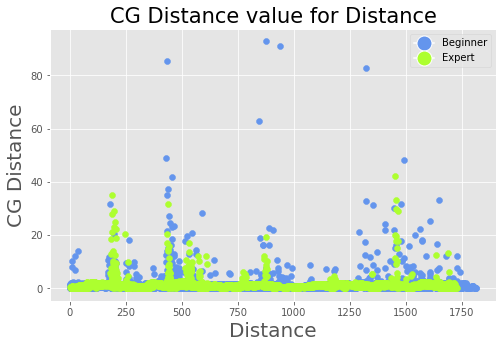

In [24]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#style.use('fivethirtyeight')
style.use('ggplot')
#style.use('seaborn-ticks')

plt.figure(figsize=(8,5))

#feature = 'CG Accel Lateral'
#feature = 'CG Accel Longitudinal'
#feature = 'CG Accel Vertical'
feature = 'CG Distance'


for i in range(0, num_exp):
    tmp = df_begin[i].astype(float)
    plt.scatter(tmp['Distance'], tmp[feature], color='cornflowerblue')
    
for j in range(0, num_exp):
    tmp = df_exp[j].astype(float)
    plt.scatter(tmp['Distance'], tmp[feature], color='greenyellow')

plt.xlabel('Distance', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title(str(feature)+" value for Distance", fontsize=21)

legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'Beginner', markerfacecolor='cornflowerblue', markersize=15),
                  Line2D([0], [0], marker='o', color='w', label = 'Expert', markerfacecolor = 'greenyellow', markersize=15)]

plt.legend(handles = legend_elements, loc='upper right')
plt.show()


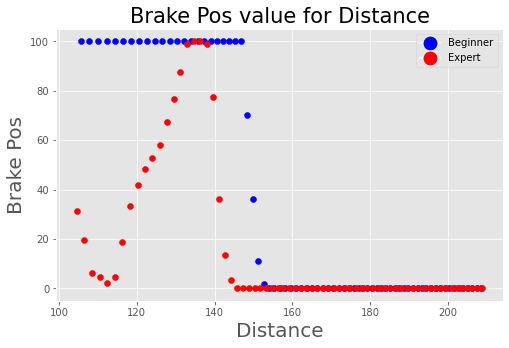

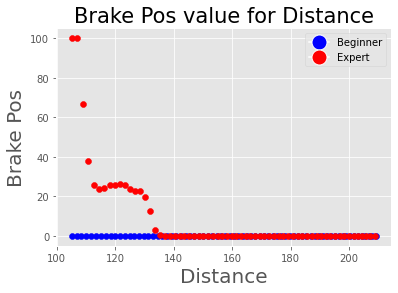

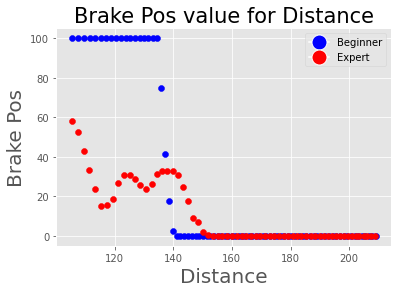

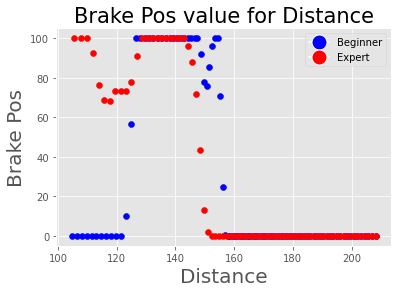

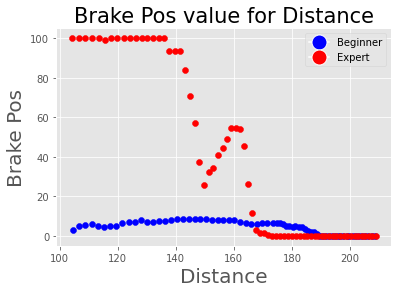

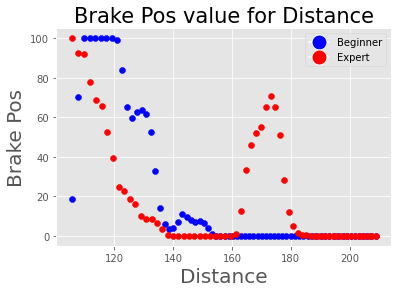

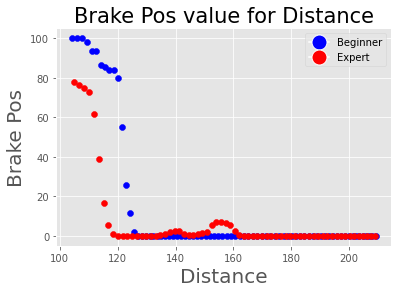

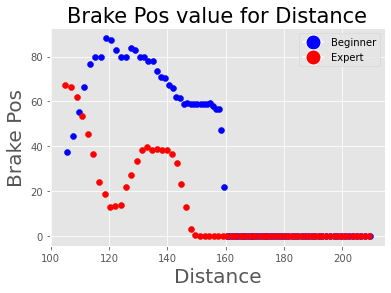

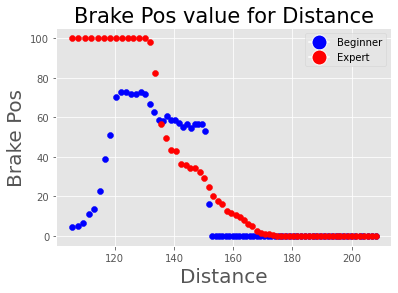

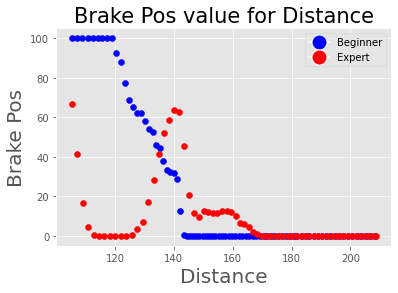

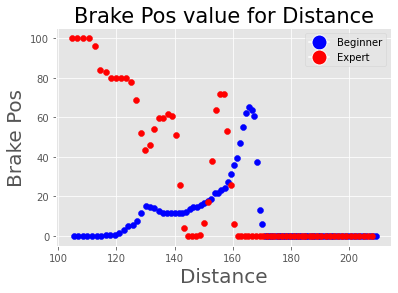

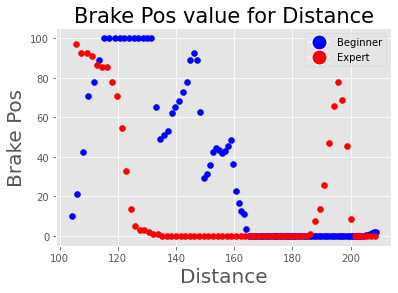

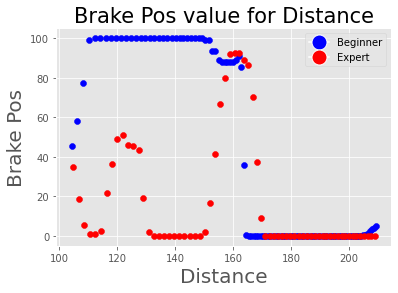

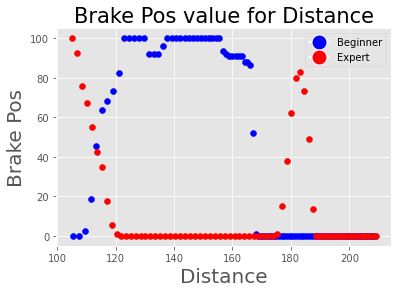

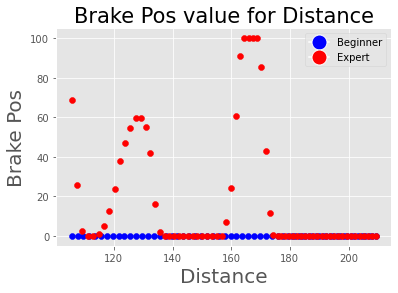

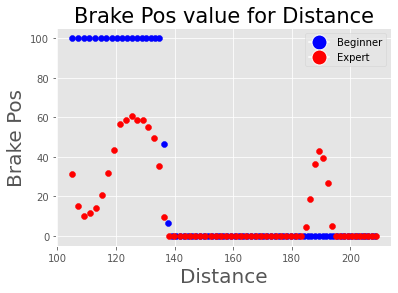

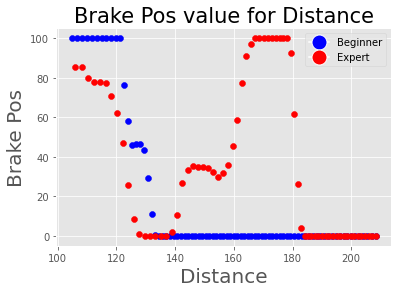

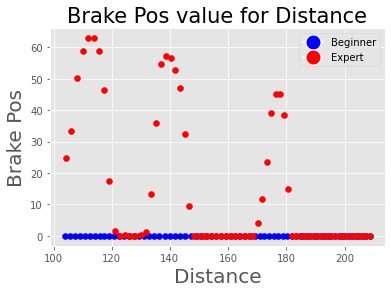

In [13]:
## Only Plotting First Index Data

feature = 'CG Accel Lateral'
#feature = 'CG Accel Longitudinal'
#feature = 'CG Accel Vertical'
#feature = 'CG Distance'
feature = "Lateral Acceleration"
#feature = "Longitudinal Acceleration"
feature = 'Throttle Pos'
feature = 'Brake Pos'
plt.figure(figsize=(8,5))


for i in range(0,18):
    tmp = df_begin[i].astype(float)
    tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
    plt.scatter(tmprows['Distance'], tmprows[feature], color='b')

    tmp = df_exp[i].astype(float)
    tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
    plt.scatter(tmprows['Distance'], tmprows[feature], color='r')


    plt.xlabel('Distance', fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.title(str(feature)+" value for Distance", fontsize=21)

    legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'Beginner', markerfacecolor='b', markersize=15),
                      Line2D([0], [0], marker='o', color='w', label = 'Expert', markerfacecolor = 'r', markersize=15)]

    plt.legend(handles = legend_elements, loc='upper right')
    plt.show()

##  Histogram

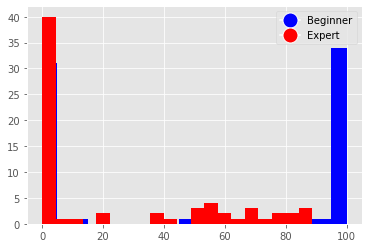

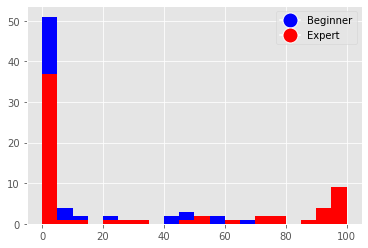

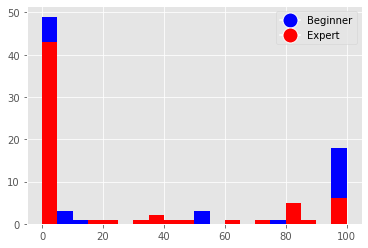

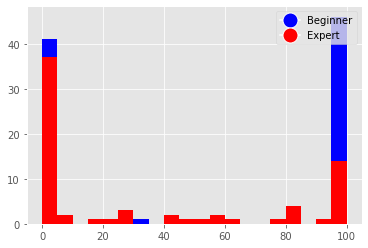

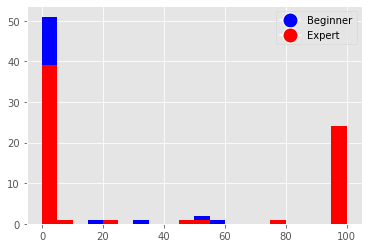

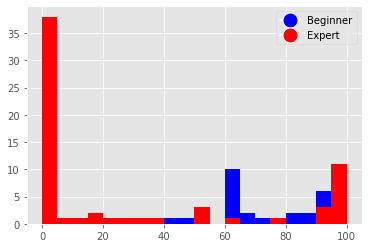

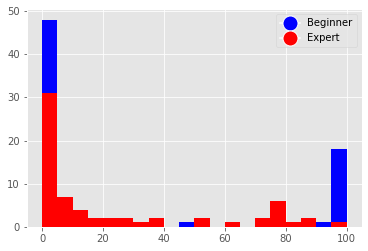

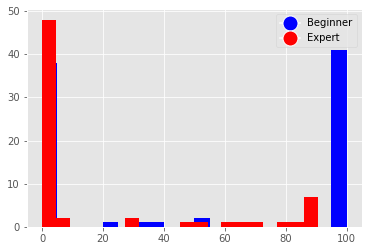

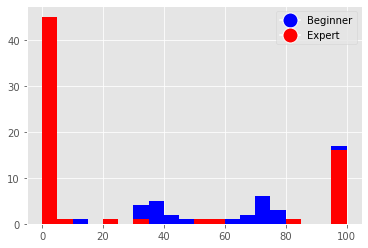

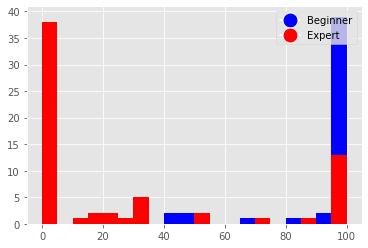

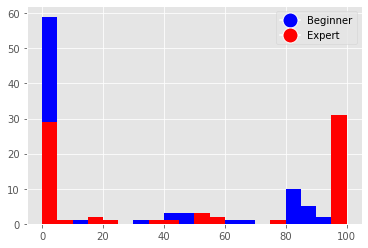

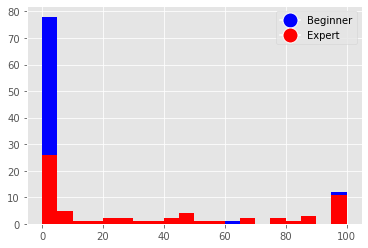

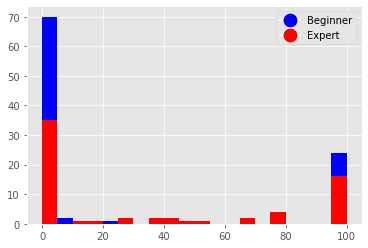

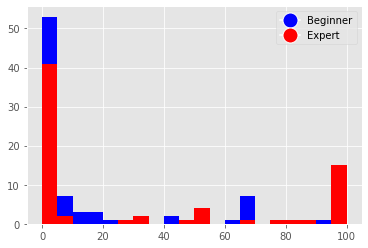

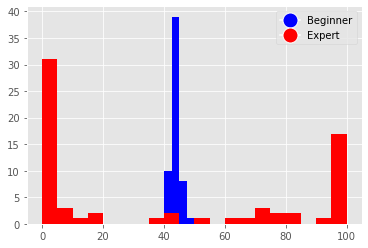

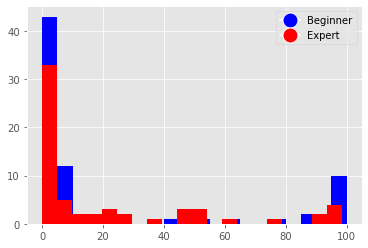

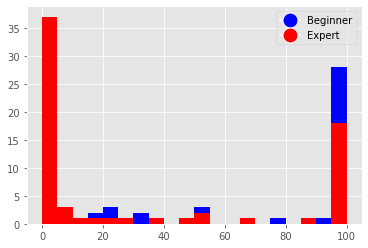

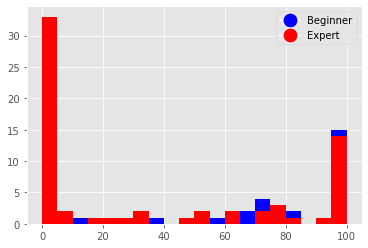

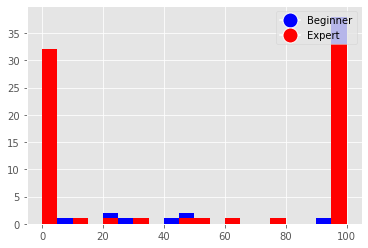

In [14]:
feature = "Throttle Pos"

for i in range(len(df_exp)):
    tmp = df_begin[i].astype(float)
    tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]
    plt.hist(tmprows[feature], bins=20,  color = 'blue')

    tmp2 = df_exp[i].astype(float)
    tmprows2 = tmp2[(tmp2['Distance'] >= curveList[curve_num][0]) & (tmp2['Distance'] <= curveList[curve_num][1])]
    plt.hist(tmprows2[feature], bins=20,  color = 'red')
    
    legend_elements = [Line2D([0], [0], marker='o', color = 'w', label = 'Beginner', markerfacecolor='b', markersize=15),
                      Line2D([0], [0], marker='o', color='w', label = 'Expert', markerfacecolor = 'r', markersize=15)]
    plt.legend(handles = legend_elements, loc='upper right')    
    plt.show()

# Mean, Standard Deviation

In [15]:
import numpy as np

feature = "Brake Pos"

for i in range(0,len(df_exp)):
    tmp = df_begin[i].astype(float)
    tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]

    data_list =[]
    data_list.append(tmprows[feature])

    print(np.mean(data_list),"/", np.std(data_list))

print("-----------------------------------------")
for i in range(0,len(df_exp)):
    tmp = df_exp[i].astype(float)
    tmprows = tmp[(tmp['Distance'] >= curveList[curve_num][0]) & (tmp['Distance'] <= curveList[curve_num][1])]

    data_list =[]
    data_list.append(tmprows[feature])

    print(np.mean(data_list),"/", np.std(data_list))


33.6125 / 46.40533056515287
0.0 / 0.0
24.824358974358972 / 42.29832749890319
27.369230769230768 / 42.92423351074783
4.360294117647059 / 3.1594926857237495
19.708695652173915 / 33.9486344270001
14.672 / 32.69712142273893
30.745238095238093 / 34.42483670384172
20.310526315789474 / 28.305693024862133
23.402531645569624 / 36.37367588501662
9.476288659793815 / 15.86915424113858
27.701960784313723 / 36.636671279332056
39.75643564356436 / 46.72103945643143
40.24044943820225 / 45.95199184860418
0.0 / 0.0
25.03918918918919 / 42.83975426270011
18.221249999999998 / 35.70152550574695
0.0 / 0.0
23.584615384615383 / 41.87075375156109
-----------------------------------------
15.913235294117646 / 29.97182944234648
9.1828125 / 20.60318205617384
10.54375 / 15.295126623781183
32.536619718309865 / 43.35050802839771
38.3735294117647 / 42.61235535287533
18.596923076923076 / 28.350601508912643
7.201515151515153 / 19.558215296470784
12.681818181818182 / 19.19735547673886
30.1910447761194 / 39.358231255547544

In [19]:
df_begin[1].describe()

,Time,Distance,Ground Speed,Brake Pos,Throttle Pos,Steering Angle,Chassis Velocity X,Chassis Velocity Y,Chassis Velocity Z,Chassis Yaw Rate,CG Accel Lateral,CG Accel Longitudinal,CG Accel Vertical,CG Distance,Lateral Velocity,Longitudinal Velocity,Lateral Acceleration,Longitudinal Acceleration
count,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332,1332
unique,1332,1324,778,38,152,800,1077,386,122,1219,350,216,126,1276,558,523,698,657
top,4.850,446.2,21.7,0.0,0.0,320.0,6.02,-0.04,-0.31,-20.96,-0.31,-0.17,0.01,0.3207802986469088,20.885899218486486,3.6010171076166766,0.0,0.0
freq,1,2,8,1213,519,95,10,33,46,3,17,26,98,3,11,24,33,42
